In [1]:
from data.bolsas_cnpq.process_xml import read_dataset
from matplotlib import pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
df = read_dataset("data/bolsas_cnpq/dataset.csv")

In [3]:
df.shape

(2140823, 17)

In [4]:
df.sample().T

,1138810
ANO-PAGAMENTO,2011
QUANTIDADE-BOLSA-ANO,1
QUANTIDADE-MESES-PAGOS,12
SEXO,M
SIGLA-UF-INSTITUICAO,CE
VALOR-PAGO,26242.4
NOME-CURSO-ID,769
NOME-DA-AREA-DO-CONHECIMENTO-ID,52
NOME-DA-ESPECIALIDADE-ID,558
NOME-DA-SUB-AREA-DO-CONHECIMENTO-ID,90


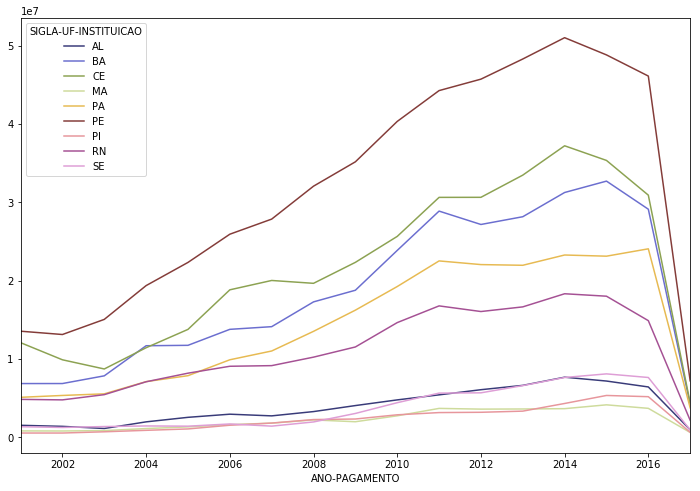

In [5]:
nordeste = ['CE', 'PE', 'RN', 'BA', 'MA', 'AL', 'PI', 'PA', 'SE']

df.groupby(['ANO-PAGAMENTO', 'SIGLA-UF-INSTITUICAO'])['VALOR-PAGO'].sum()\
.loc[(slice(None), nordeste)]\
.unstack().plot(figsize=(12, 8), cmap=plt.cm.Vega20b)

In [6]:
modalidade = pd.read_csv("data/bolsas_cnpq/MODALIDADE-DO-PROCESSO.csv")

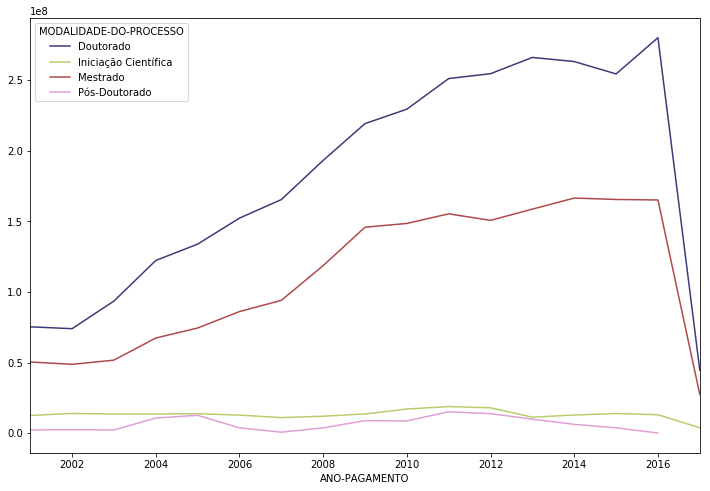

In [12]:
pd.merge(df, modalidade).groupby(['ANO-PAGAMENTO', 'MODALIDADE-DO-PROCESSO'])['VALOR-PAGO'].sum()\
.loc[(slice(None), ['Mestrado', 'Doutorado', 'Pós-Doutorado', 'Iniciação Científica'])]\
.unstack().plot(figsize=(12, 8), cmap=plt.cm.Vega20b)